<a href="https://colab.research.google.com/github/StevenBlaine/MLA_SRB/blob/main/FinalProject_Classification_SRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Problem 2 - Classification** #  
**Steven Blaine
<br>CS430-ON
<br>Machine Learning in the Cloud** 

## Step 1: Imports

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Imports for Specific Models
 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Confusion Matrix Function
Function for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### Straight Line Plot Function

In [7]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

### Step 2: Acquire Data (Reading the Data)

Found in the UCI collection, this set contains data for car parking facilities in Birmingham (UK).

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Birmingham_carpark_dataset.csv')

### Step 3: Statistical and Visual Exploration

In [9]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [10]:
df.tail()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35
35716,Shopping,1920,1180,2016-12-19 16:30:35


In [11]:
df.sample(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
27248,Others-CCCPS119a,2803,475,2016-11-13 14:27:35
32532,Others-CCCPS8,1322,782,2016-11-16 14:27:52
22644,Bull Ring,3053,2622,2016-12-18 13:30:26
11282,BHMEURBRD02,220,29,2016-12-11 14:59:43
19845,BHMNCPRAN01,600,111,2016-11-27 14:52:25
15405,BHMNCPNHS01,500,366,2016-10-07 11:30:28
33337,Others-CCCPS98,3103,1172,2016-10-17 12:57:17
11789,BHMMBMMBX01,687,349,2016-10-26 08:32:27
15092,BHMNCPLDH01,720,583,2016-12-02 14:58:50
16308,BHMNCPNHS01,500,455,2016-12-15 14:00:06


In [12]:
df.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [13]:
df.corr()

,Capacity,Occupancy
Capacity,1.000000,0.775825
Occupancy,0.775825,1.000000


In [ ]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [ ]:
df.SystemCodeNumber.value_counts()

BHMBCCMKT01         1312
BHMNCPHST01         1312
Others-CCCPS98      1312
Others-CCCPS8       1312
Others-CCCPS202     1312
Others-CCCPS135a    1312
Others-CCCPS119a    1312
Others-CCCPS105a    1312
Broad Street        1312
BHMNCPNST01         1312
Shopping            1312
BHMMBMMBX01         1312
BHMEURBRD01         1312
BHMBCCTHL01         1312
BHMBCCSNH01         1294
Others-CCCPS133     1294
BHMNCPLDH01         1292
BHMNCPPLS01         1291
BHMBCCPST01         1276
BHMEURBRD02         1276
NIA Car Parks       1204
NIA South           1204
Bull Ring           1186
BHMNCPRAN01         1186
BHMBRCBRG03         1186
BHMBRCBRG02         1186
BHMBRCBRG01         1186
BHMNCPNHS01         1038
NIA North            162
BHMBRTARC01           88
Name: SystemCodeNumber, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


Removing the unnecessary update date field.

In [14]:
df.drop(['LastUpdated'], axis=1, inplace = True)

In [15]:
df.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy'], dtype='object')

Adding columns to reflect capacity utilization for each parking facility (for present purposes, "near capacity" is defined as the facility being at least 80% full (and the related new field will be assigned a "1" if so and a "0" value if not).

In [16]:
df['PercentFull'] = df.apply(lambda row: row.Occupancy / row.Capacity, axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SystemCodeNumber  35717 non-null  object 
 1   Capacity          35717 non-null  int64  
 2   Occupancy         35717 non-null  int64  
 3   PercentFull       35717 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB


In [18]:
df['NearCapacity'] = np.where(df['PercentFull']>= 0.8, 1, 0)

In [19]:
df.sample(20)

,SystemCodeNumber,Capacity,Occupancy,PercentFull,NearCapacity
11333,BHMEURBRD02,220,179,0.813636,1
23314,NIA Car Parks,1268,201,0.158517,0
13522,BHMNCPHST01,1200,722,0.601667,0
31682,Others-CCCPS202,2937,1279,0.435478,0
1887,BHMBCCPST01,317,102,0.321767,0
18376,BHMNCPPLS01,450,174,0.386667,0
9616,BHMEURBRD01,470,219,0.465957,0
16194,BHMNCPNHS01,500,405,0.810000,1
11439,BHMMBMMBX01,687,648,0.943231,1
35100,Shopping,1920,634,0.330208,0


In [20]:
df.replace(to_replace ="Others-",
                 value ="Others",
           inplace = True, regex = True)

In [21]:
df.sample(30)

,SystemCodeNumber,Capacity,Occupancy,PercentFull,NearCapacity
10732,BHMEURBRD02,220,151,0.686364,0
26069,OthersCCCPS105a,2009,710,0.353410,0
1368,BHMBCCPST01,317,124,0.391167,0
7869,BHMBRCBRG03,849,413,0.486455,0
24789,NIA South,788,212,0.269036,0
32095,OthersCCCPS8,1322,628,0.475038,0
19922,BHMNCPRAN01,600,302,0.503333,0
35345,Shopping,1920,390,0.203125,0
33653,OthersCCCPS98,3103,545,0.175636,0
4760,BHMBCCTHL01,387,392,1.012920,1


Pairplots.

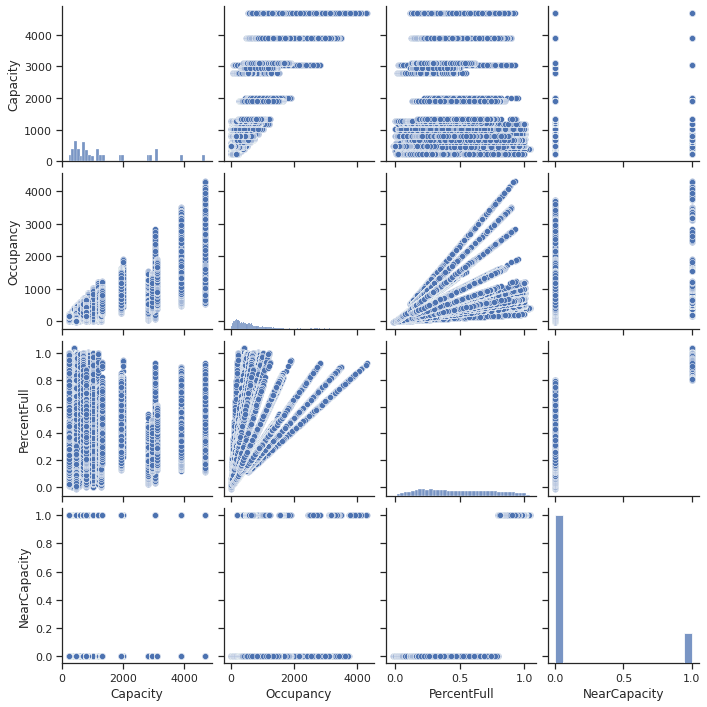

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.show()

### Step 4: Creating DataFrames and Splitting the Data

Creating X DataFrame.

In [22]:
X = df.iloc[:,1:-1]

Creating y DataFrame. 

In [23]:
y = df[['NearCapacity']]

Splitting.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

### Step 5A: Building a Logistic Regression Pipeline

Creating column transformer that will MinMax scale numerical variables.

In [25]:
num_attribs = ['Capacity', 'Occupancy', 'PercentFull']

In [26]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs)], 
                               remainder='passthrough')

Creating pipeline that will transform the data and run the Logistic Regression algorithm.


In [27]:
LRpipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
])

### Step 6A: Executing the Logistic Regression Model

In [28]:
LRpipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Capacity', 'Occupancy',
                                                   'PercentFull'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

Running the pipeline to fit the model.

---



In [29]:
LRpipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Capacity', 'Occupancy',
                                                   'PercentFull'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

### Step 7A: Evaluating the Logistic Regression Model

Running pipeline to predict y values from the test data set and saving them in a variable called y_pred.

In [30]:
y_pred = LRpipeline.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5936
           1       1.00      0.98      0.99      1208

    accuracy                           1.00      7144
   macro avg       1.00      0.99      0.99      7144
weighted avg       1.00      1.00      1.00      7144



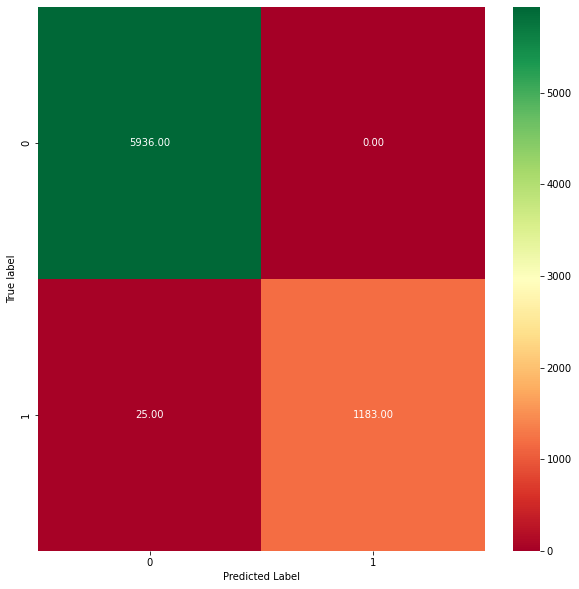

In [34]:
plot_cm(y_test,y_pred)

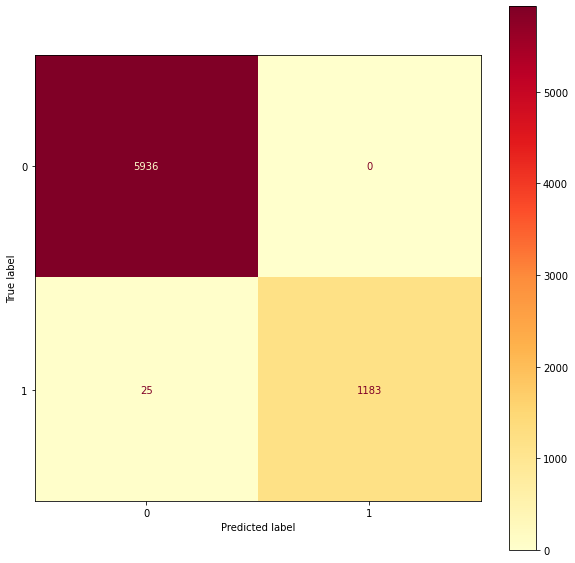

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

### Step 5B: Building a Decision Tree Pipeline

In [36]:
num_attribs = ['Capacity', 'Occupancy', 'PercentFull']

col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs)])

DTpipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
                     ])

###Step 6B: Executing the Decision Tree Model

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SystemCodeNumber  35717 non-null  object 
 1   Capacity          35717 non-null  int64  
 2   Occupancy         35717 non-null  int64  
 3   PercentFull       35717 non-null  float64
 4   NearCapacity      35717 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
df.sample(15)

,SystemCodeNumber,Capacity,Occupancy,PercentFull,NearCapacity
7386,BHMBRCBRG02,1194,796,0.666667,0
23425,NIA Car Parks,1268,96,0.075710,0
4482,BHMBCCTHL01,387,326,0.842377,1
31907,Others-CCCPS8,1322,442,0.334342,0
2219,BHMBCCPST01,317,176,0.555205,0
19200,BHMNCPRAN01,600,66,0.110000,0
32627,Others-CCCPS8,1322,406,0.307110,0
5008,BHMBCCTHL01,387,402,1.038760,1
21654,Bull Ring,3053,2195,0.718965,0
5607,BHMBRCBRG01,1010,709,0.701980,0


In [38]:
DTpipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Capacity', 'Occupancy',
                                                   'PercentFull'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

###Step 7B: Evaluating the Decision Tree Model 

In [39]:
y_pred = DTpipeline.predict(X_test)

In [40]:
print(mean_squared_error(y_test, y_pred)**(0.5))

0.0


In [41]:
y_pred = DTpipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred)**(0.5))

0.0


The 0 values for RMSE indicate a well-fitting model.

###Step 7C: Using Gridsearch with the Decision Tree Model

In [ ]:
parameters = {'decision_tree__max_features': ['auto', 'sqrt', 'log2'],
              'decision_tree__ccp_alpha': [0.1, .01, .001],
              'decision_tree__max_depth' : [5, 6, 7, 8, 9],
              'decision_tree__criterion' :['gini', 'entropy']}

In [ ]:
grid_pipeline = GridSearchCV(DTpipeline, param_grid = parameters, cv=5, verbose=True)

In [ ]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Capacity',
                                                                          'Occupancy',
                                                                          'PercentFull'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__ccp_alpha': [0.1, 0.01, 0.001],
                         'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 6, 7, 8, 9],
                         'decision_tree__max_features': ['auto', 'sqrt',
                                                         'log2']},
             verbose=True)

In [ ]:
sorted(DTpipeline.get_params().keys())

['decision_tree',
 'decision_tree__ccp_alpha',
 'decision_tree__class_weight',
 'decision_tree__criterion',
 'decision_tree__max_depth',
 'decision_tree__max_features',
 'decision_tree__max_leaf_nodes',
 'decision_tree__min_impurity_decrease',
 'decision_tree__min_samples_leaf',
 'decision_tree__min_samples_split',
 'decision_tree__min_weight_fraction_leaf',
 'decision_tree__random_state',
 'decision_tree__splitter',
 'memory',
 'steps',
 'transform',
 'transform__n_jobs',
 'transform__num',
 'transform__num__clip',
 'transform__num__copy',
 'transform__num__feature_range',
 'transform__remainder',
 'transform__sparse_threshold',
 'transform__transformer_weights',
 'transform__transformers',
 'transform__verbose',
 'transform__verbose_feature_names_out',
 'verbose']

In [ ]:
grid_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Capacity',
                                                                          'Occupancy',
                                                                          'PercentFull'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__ccp_alpha': [0.1, 0.01, 0.001],
                         'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 6, 7, 8, 9],
                         'decision_tree__max_features': ['auto', 'sqrt',
                                                         'log2']},
             verbose=True)

In [ ]:
y_pred2 = grid_pipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred2)**(0.5))

0.33922510365257147


In [ ]:
grid_pipeline.best_params_

{'decision_tree__ccp_alpha': 0.1,
 'decision_tree__criterion': 'entropy',
 'decision_tree__max_depth': 8,
 'decision_tree__max_features': 'sqrt'}

In [ ]:
grid_pipeline.score(X_test, np.ravel(y_test))

0.8783594624860023

###Step 7D: Selection and Application of Precision-Recall Curve

An ROC curve shows true positive rate as a function of false positive rate, and neither of those exists in the context of regression; so the choice was mad to apply a Precision-Recall Curve.

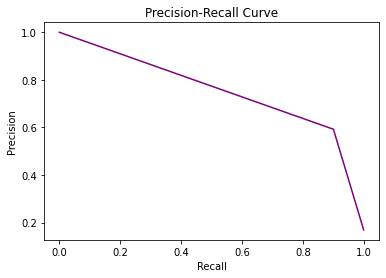

In [ ]:
y_pred = grid_pipeline.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

The x-axis shows the recall and the y-axis shows the precision for various thresholds. As recall increases, precision decreases -- here, fairly linearly until a dramatic drop at the 0.9 recall mark.

### Step 8: Conclusion
The performance measures utilized above show that the Decision Tree model outperforms the Logistic Regression model for classification according to the definition herein of a "near capacity" parking facility, although both models performed well.  Testing various Gridsearch parameters for the Decision Tree model yielded interesting results, but no performance increase.